In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr 

In [ ]:
#load network
df = pd.read_csv('CosciaRios2012_DataBase.csv')
df.drop(columns=['State'], inplace=True)
df.head()


,Code,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
0,1001,1990,0,0,0,0,0,0,0,0,0,0
1,1001,1991,0,0,0,0,0,0,0,0,0,0
2,1001,1992,0,0,0,0,0,0,0,0,0,0
3,1001,1993,0,0,0,0,0,0,0,0,0,0
4,1001,1994,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51596 entries, 0 to 51595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Code                  51596 non-null  int64
 1   Year                  51596 non-null  int64
 2   Beltran_Leyva         51596 non-null  int64
 3   Beltran_Leyva_Family  51596 non-null  int64
 4   Familia               51596 non-null  int64
 5   Golfo                 51596 non-null  int64
 6   Juarez                51596 non-null  int64
 7   Sinaloa               51596 non-null  int64
 8   Sinaloa_Family        51596 non-null  int64
 9   Tijuana               51596 non-null  int64
 10  Zetas                 51596 non-null  int64
 11  Otros                 51596 non-null  int64
dtypes: int64(12)
memory usage: 4.7 MB


In [5]:
df['Year'].value_counts()

Year
1990    2457
2001    2457
2009    2457
2008    2457
2007    2457
2006    2457
2005    2457
2004    2457
2003    2457
2002    2457
2000    2457
1991    2457
1999    2457
1998    2457
1997    2457
1996    2457
1995    2457
1994    2457
1993    2457
1992    2457
2010    2456
Name: count, dtype: int64

In [ ]:
#create adjacency matrices for each year and list of empty municipalities
unique_years = df['Year'].unique().tolist()
matrices = {}
empty_municipalities = {}
family_cols = df.columns[3:]
n = len(family_cols)

for year in unique_years:

    df_year = df[df['Year'] == year]
    adj_matrix = np.zeros((n, n), dtype=int)
    empty_mun = []

    for _, row in df_year.iterrows():

        present = []
        for i, fam in enumerate(family_cols):
            if row[fam] != 0:
                present.append(i)
        if present:
            for i in present:
                for j in present:
                    adj_matrix[i, j] += 1
        else:
            empty_mun.append(row['Code'])

    matrices[year] = adj_matrix
    empty_municipalities[year] = empty_mun


In [43]:
matrices

{1990: array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 1991: array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 1992: array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 

In [7]:

all_years_matrix = np.sum(np.array(list(matrices.values())), axis=0)

all_years_matrix

array([[ 154,   43,   65,   34,   71,   46,   26,   50,   34],
       [  43,  644,  215,   35,  126,   56,   24,  285,   52],
       [  65,  215, 1320,   89,  190,   46,   65,  729,   72],
       [  34,   35,   89,  421,  187,   28,   40,   63,   31],
       [  71,  126,  190,  187,  874,   75,  100,  184,   82],
       [  46,   56,   46,   28,   75,  153,   29,   58,   32],
       [  26,   24,   65,   40,  100,   29,  316,   54,   62],
       [  50,  285,  729,   63,  184,   58,   54, 1587,   74],
       [  34,   52,   72,   31,   82,   32,   62,   74,  171]])

In [52]:
nonzero_years = [year for year, mat in matrices.items() if np.any(mat != 0)]
print("Years with non-zero adjacency entries:", nonzero_years)

Years with non-zero adjacency entries: [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [44]:
empty_municipalities

{1990: [1001,
  1002,
  1003,
  1004,
  1005,
  1006,
  1007,
  1008,
  1009,
  1010,
  1011,
  2001,
  2002,
  2003,
  2004,
  2005,
  3001,
  3002,
  3003,
  3008,
  3009,
  4001,
  4002,
  4003,
  4004,
  4005,
  4006,
  4007,
  4008,
  4009,
  4010,
  4011,
  5001,
  5002,
  5003,
  5004,
  5005,
  5006,
  5007,
  5008,
  5009,
  5010,
  5011,
  5012,
  5013,
  5014,
  5015,
  5016,
  5017,
  5018,
  5019,
  5020,
  5021,
  5022,
  5023,
  5024,
  5025,
  5026,
  5027,
  5028,
  5029,
  5030,
  5031,
  5032,
  5033,
  5034,
  5035,
  5036,
  5037,
  5038,
  6001,
  6002,
  6003,
  6004,
  6005,
  6006,
  6007,
  6008,
  6009,
  6010,
  7001,
  7002,
  7003,
  7004,
  7005,
  7006,
  7007,
  7008,
  7009,
  7010,
  7011,
  7012,
  7013,
  7014,
  7015,
  7016,
  7017,
  7018,
  7019,
  7020,
  7021,
  7022,
  7023,
  7024,
  7025,
  7026,
  7027,
  7028,
  7029,
  7030,
  7031,
  7032,
  7033,
  7034,
  7035,
  7036,
  7037,
  7038,
  7039,
  7040,
  7041,
  7042,
  7043,
  7044,
  

In [ ]:
#adding labels to nodes
mapping = {i: fam for i, fam in enumerate(family_cols)}
print(mapping)

{0: 'Beltran_Leyva_Family', 1: 'Familia', 2: 'Golfo', 3: 'Juarez', 4: 'Sinaloa', 5: 'Sinaloa_Family', 6: 'Tijuana', 7: 'Zetas', 8: 'Otros'}


In [1]:
#fixing nodes for graph
all_edges = set()
for year in matrices:
    mat = matrices[year].copy()
    np.fill_diagonal(mat, 0)
    G = nx.from_numpy_array(mat)
    mapping = {i: fam for i, fam in enumerate(family_cols)}
    G = nx.relabel_nodes(G, mapping)
    all_edges.update(G.edges())

G_all = nx.Graph()
G_all.add_nodes_from(family_cols)
G_all.add_edges_from(all_edges)
fixed_pos = nx.spring_layout(G_all, seed=42, k=0.3)
print(fixed_pos)

NameError: name 'matrices' is not defined

In [ ]:

import imageio
import os

years_to_plot = list(range(1991, 2011))
frames = []
temp_dir = "network_frames_fixed_temp"
os.makedirs(temp_dir, exist_ok=True)

for idx, year in enumerate(years_to_plot):
    mat = matrices[year].copy()
    np.fill_diagonal(mat, 0)
    G = nx.from_numpy_array(mat)
    G = nx.relabel_nodes(G, mapping)
    plt.figure(figsize=(7,6))
    nx.draw_networkx_edges(G, fixed_pos, alpha=0.3, edge_color='gray', width=1)
    nx.draw_networkx_nodes(G, fixed_pos, node_color='#4FC3F7', node_size=200, edgecolors='black', linewidths=0.5)
    nx.draw_networkx_labels(G, fixed_pos, font_size=7, font_color='#222222', font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v > 0}
    nx.draw_networkx_edge_labels(G, fixed_pos, edge_labels=edge_labels, font_size=6, font_color='#444444')
    plt.title(f"Year: {year}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    fname = os.path.join(temp_dir, f"frame_{idx:02d}.png")
    plt.savefig(fname)
    plt.close()
    frames.append(imageio.imread(fname))


imageio.mimsave('network_evolution_fixed.gif', frames, duration=0.8)

import shutil
shutil.rmtree(temp_dir)

print("Animation saved as 'network_evolution_fixed.gif'")

C:\Users\Andrius\AppData\Local\Temp\ipykernel_21060\4096975322.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fname))


Animation saved as 'network_evolution_fixed.gif'


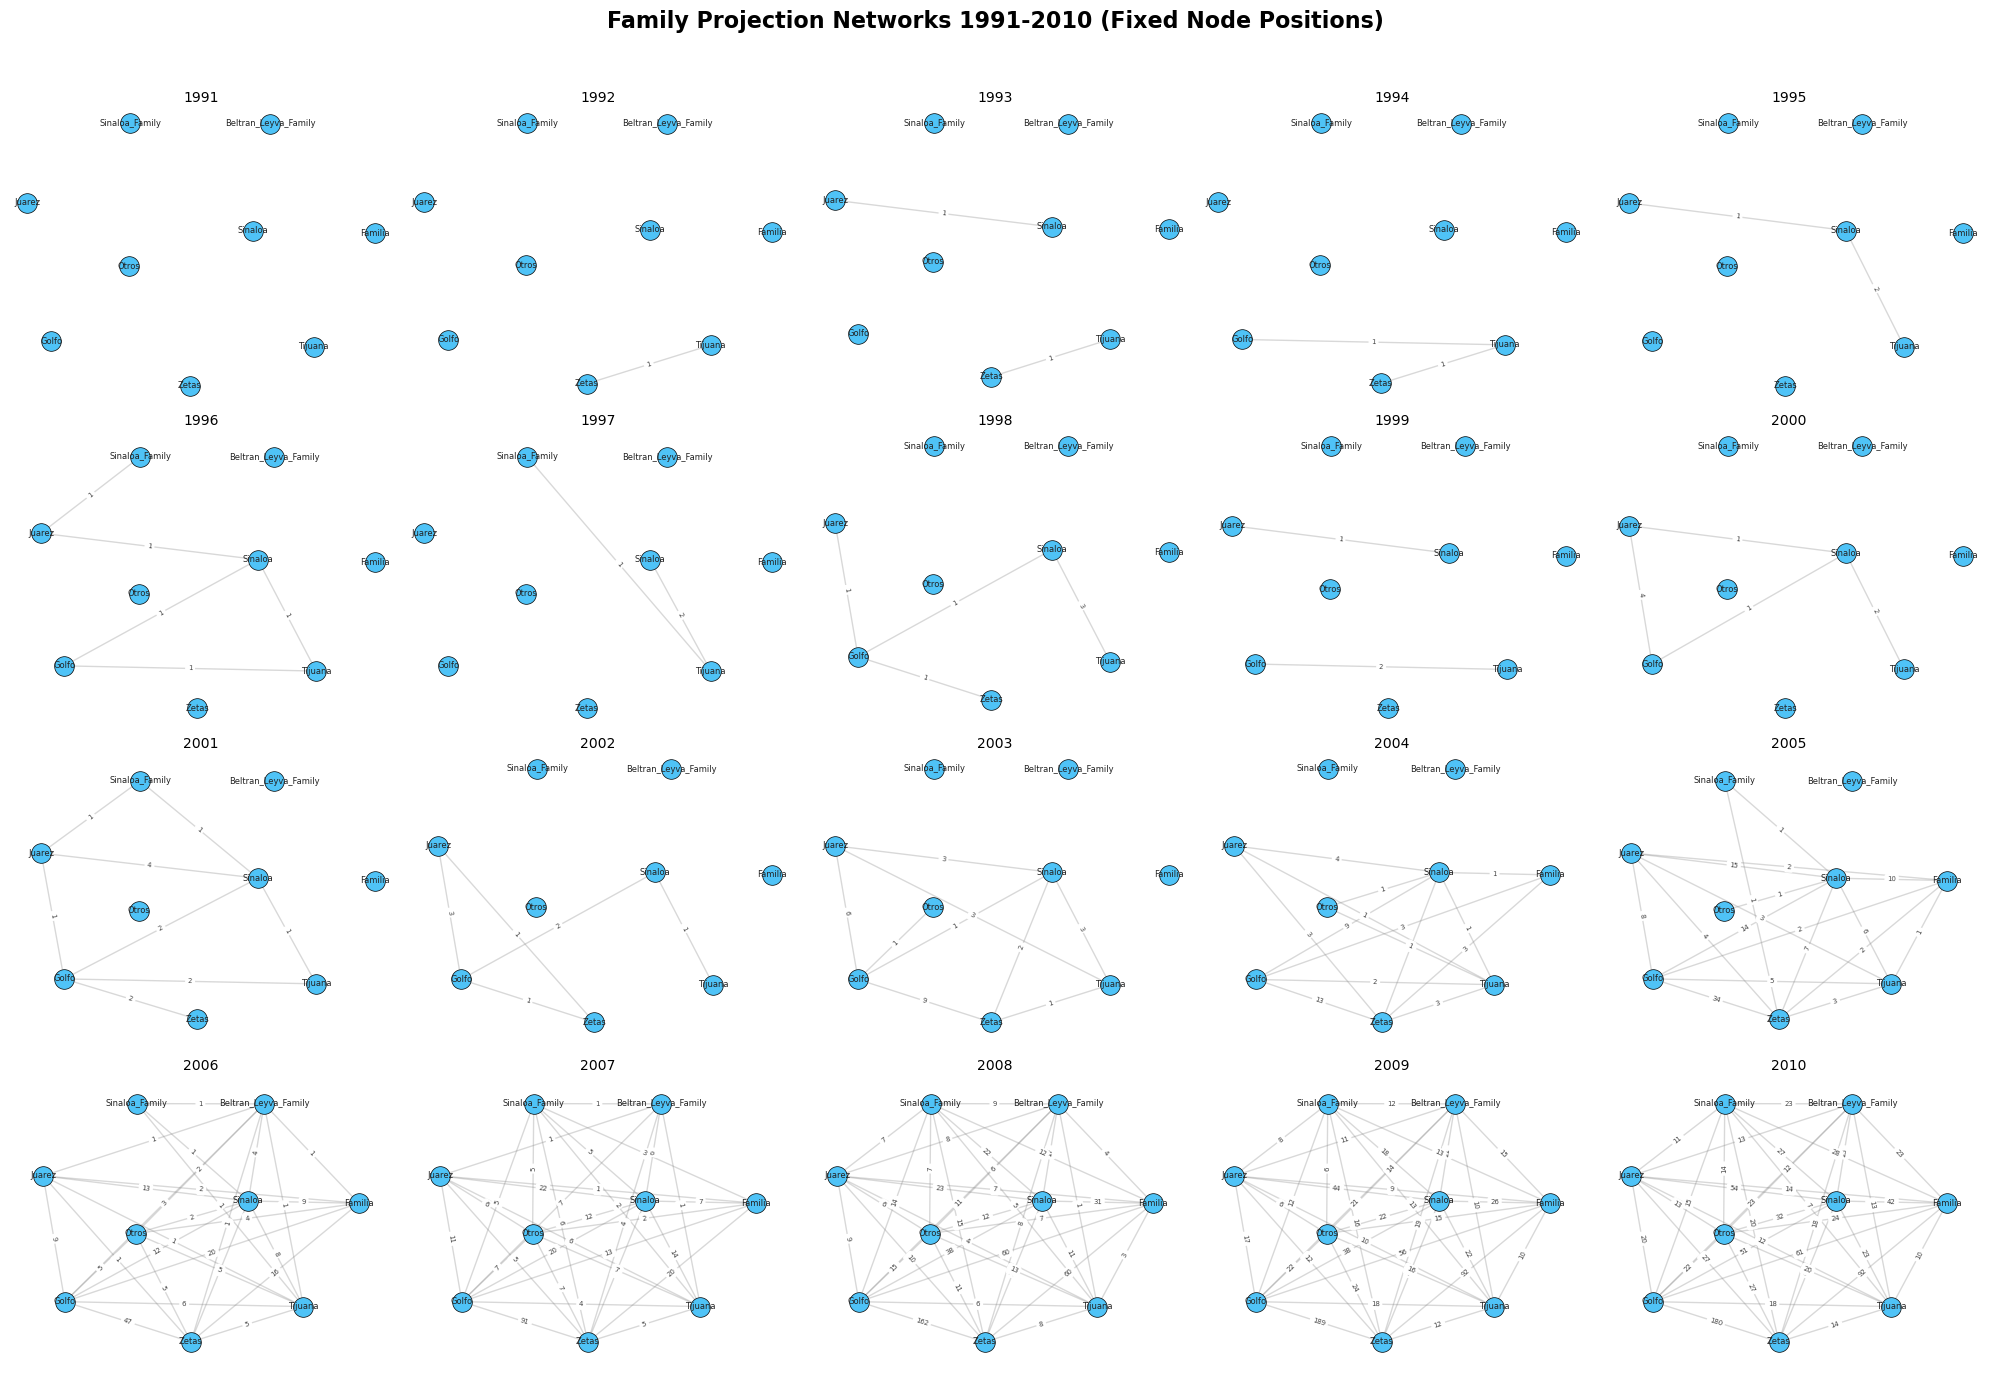

In [ ]:
#plot all yearly networks (1991-2010) in one image with fixed node positions

years_to_plot = list(range(1991, 2011))
num_years = len(years_to_plot)
cols = 5
rows = (num_years + cols - 1) // cols

plt.figure(figsize=(cols*4, rows*3.5))

for idx, year in enumerate(years_to_plot):
    mat = matrices[year].copy()
    np.fill_diagonal(mat, 0)
    G = nx.from_numpy_array(mat)
    G = nx.relabel_nodes(G, mapping)
    plt.subplot(rows, cols, idx+1)
    nx.draw_networkx_edges(G, fixed_pos, alpha=0.3, edge_color='gray', width=1)
    nx.draw_networkx_nodes(G, fixed_pos, node_color='#4FC3F7', node_size=200, edgecolors='black', linewidths=0.5)
    nx.draw_networkx_labels(G, fixed_pos, font_size=6, font_color='#222222', font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v > 0}
    nx.draw_networkx_edge_labels(G, fixed_pos, edge_labels=edge_labels, font_size=5, font_color='#444444')
    plt.title(str(year), fontsize=10)
    plt.axis('off')

plt.suptitle('Family Projection Networks 1991-2010 (Fixed Node Positions)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [63]:
df[df['Year'] == 2010]

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
20,1001,1,2010,0,0,1,0,1,0,0,0,1,0
41,1002,1,2010,0,0,1,0,0,1,0,0,0,0
62,1003,1,2010,0,0,0,0,0,0,0,0,1,0
83,1004,1,2010,0,0,0,0,0,0,0,0,0,0
104,1005,1,2010,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51491,32053,32,2010,0,0,0,0,0,0,0,0,0,0
51512,32054,32,2010,0,0,0,0,0,0,0,0,0,0
51533,32055,32,2010,0,0,0,0,0,0,0,0,1,0
51554,32056,32,2010,0,0,1,1,0,1,0,0,1,0


In [ ]:
#calculate network properties for every year, including diameter

years_to_analyze = list(range(1990, 2011))
results = []

for year in years_to_analyze:
    mat = matrices[year].copy()
    np.fill_diagonal(mat, 0)
    G = nx.from_numpy_array(mat)
    G = nx.relabel_nodes(G, mapping)
    num_edges = G.number_of_edges()
    density = nx.density(G)

    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:

        components = list(nx.connected_components(G))
        if components:
            largest_cc = G.subgraph(max(components, key=len))
            if largest_cc.number_of_nodes() > 1:
                diameter = nx.diameter(largest_cc)
            else:
                diameter = float('nan')
        else:
            diameter = float('nan')
    results.append({'year': year, 'num_edges': num_edges, 'density': density, 'diameter': diameter})

results_df = pd.DataFrame(results)
results_df

,year,num_edges,density,diameter
0,1990,0,0.000000,NaN
1,1991,0,0.000000,NaN
2,1992,1,0.027778,1.0
3,1993,2,0.055556,1.0
4,1994,2,0.055556,2.0
5,1995,2,0.055556,2.0
6,1996,5,0.138889,3.0
7,1997,2,0.055556,2.0
8,1998,4,0.111111,3.0
9,1999,2,0.055556,1.0


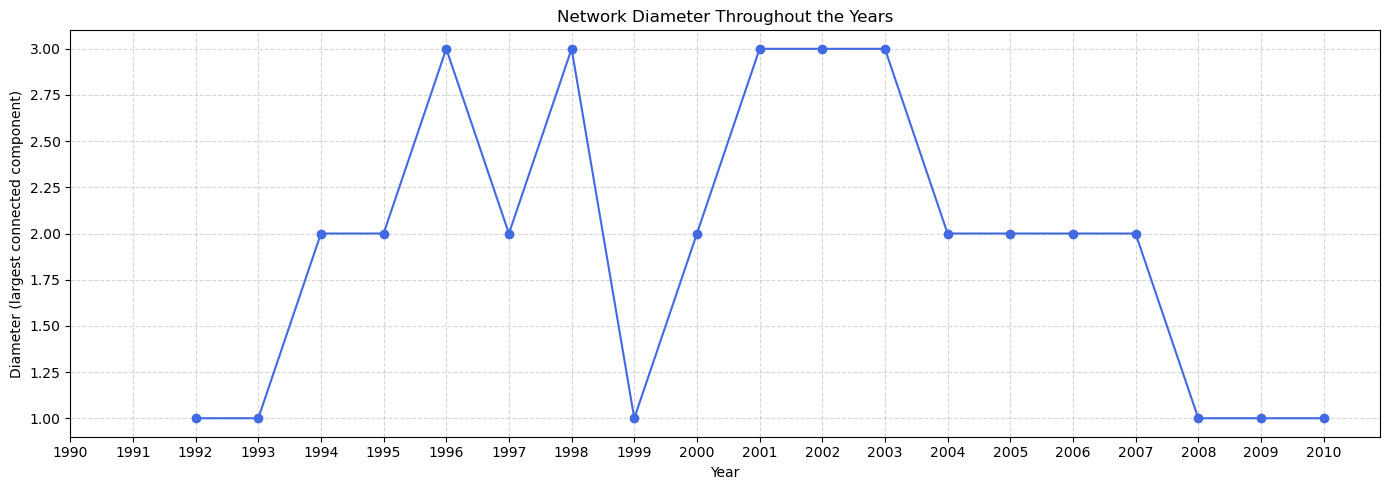

In [ ]:
#plot the diameter throughout the years

plt.figure(figsize=(14,5))  
plt.plot(results_df['year'], results_df['diameter'], marker='o', linestyle='-', color='royalblue')
plt.xlabel('Year')
plt.ylabel('Diameter (largest connected component)')
plt.title('Network Diameter Throughout the Years')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(results_df['year'], [str(int(y)) for y in results_df['year']])
plt.tight_layout()
plt.show()

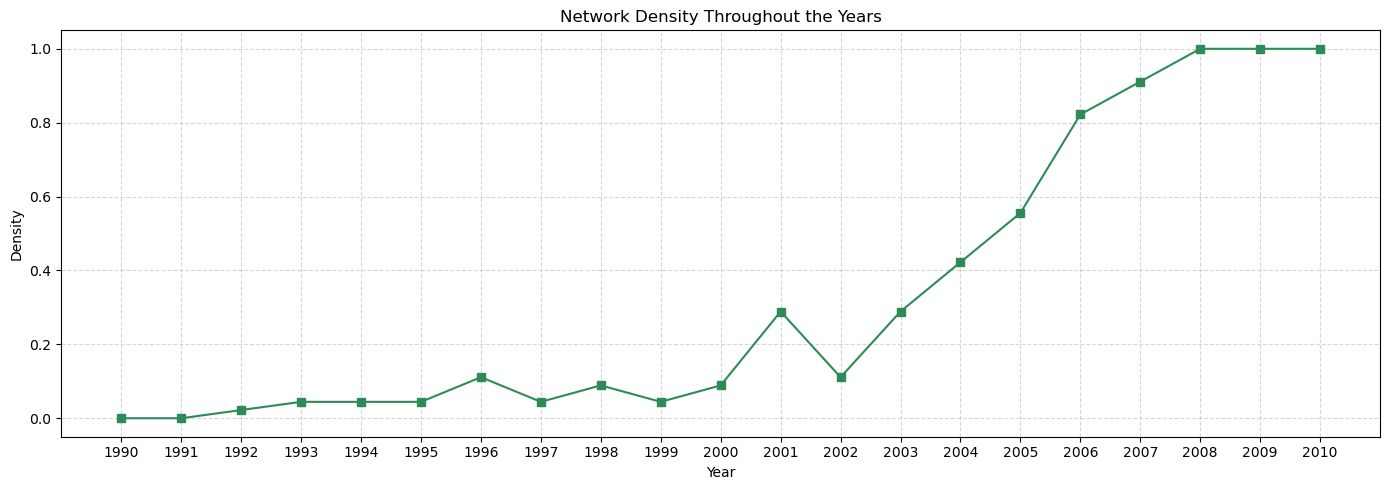

In [ ]:
#plot the network density throughout the years

plt.figure(figsize=(14,5))
plt.plot(results_df['year'], results_df['density'], marker='s', linestyle='-', color='seagreen')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Network Density Throughout the Years')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(results_df['year'], [str(int(y)) for y in results_df['year']])
plt.tight_layout()
plt.show()

In [ ]:
#sum of edge weights for each family each year
family_weight_sums = []
for year in sorted(matrices.keys()):
    mat = matrices[year].copy()
    np.fill_diagonal(mat, 0)

    sums = mat.sum(axis=1)
    for idx, fam in enumerate(family_cols):
        family_weight_sums.append({'year': year, 'family': fam, 'weight_sum': sums[idx]})
family_weights_df = pd.DataFrame(family_weight_sums)
family_weights_df_pivot = family_weights_df.pivot(index='year', columns='family', values='weight_sum')
family_weights_df_pivot

family,Beltran_Leyva_Family,Familia,Golfo,Juarez,Otros,Sinaloa,Sinaloa_Family,Tijuana,Zetas
year,,,,,,,,,
1990,0,0,0,0,0,0,0,0,0
1991,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,0,0,1,1
1993,0,0,0,1,0,1,0,1,1
1994,0,0,1,0,0,0,0,2,1
1995,0,0,0,1,0,3,0,2,0
1996,0,0,2,2,0,3,1,2,0
1997,0,0,0,0,0,2,1,3,0
1998,0,0,3,1,0,4,0,3,1


In [ ]:
family_weights_df_pivot

array([[ 57,  23,  23,  13,  23,  23,  13,  18,  12],
       [ 23, 227,  61,  14,  42,  28,  10,  92,  24],
       [ 23,  61, 244,  20,  51,  15,  18, 180,  22],
       [ 13,  14,  20,  74,  54,  11,  12,  27,  13],
       [ 23,  42,  51,  54, 176,  27,  23,  65,  32],
       [ 23,  28,  15,  11,  27,  53,   7,  20,  14],
       [ 13,  10,  18,  12,  23,   7,  39,  14,  20],
       [ 18,  92, 180,  27,  65,  20,  14, 405,  27],
       [ 12,  24,  22,  13,  32,  14,  20,  27,  54]])

In [ ]:
#average sum of edge weights per family for each year
family_weights_df_pivot['average_weight_sum'] = family_weights_df_pivot.mean(axis=1)
avg_weights_df = family_weights_df_pivot[['average_weight_sum']].copy()
avg_weights_df

family,average_weight_sum
year,
1990,0.000000
1991,0.000000
1992,0.222222
1993,0.444444
1994,0.444444
1995,0.666667
1996,1.111111
1997,0.666667
1998,1.333333


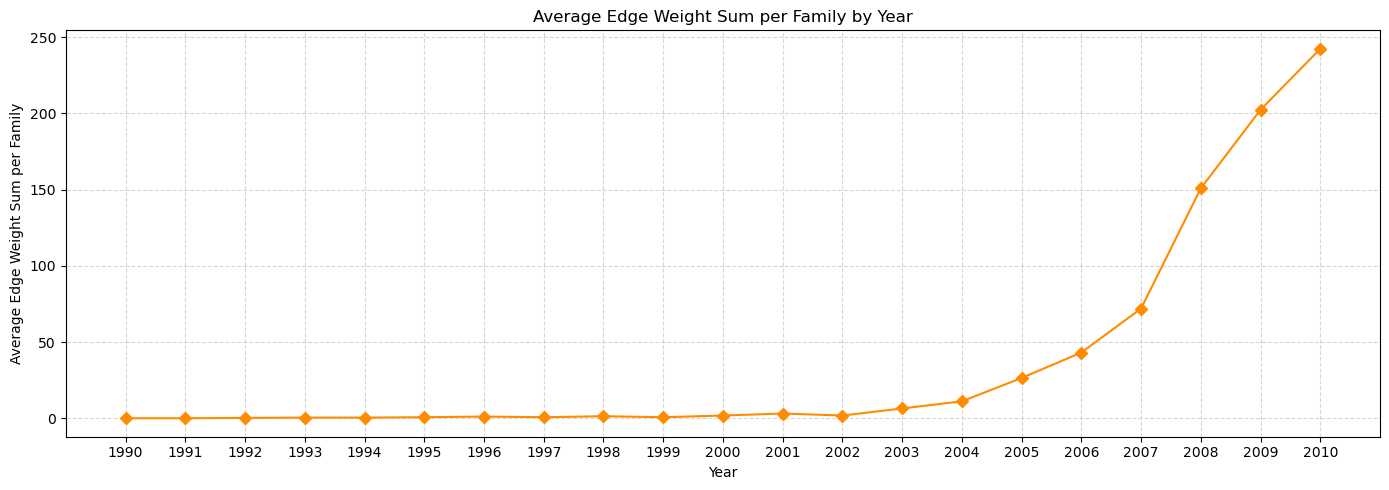

In [ ]:
#plot the average sum of edge weights per family for each year


plt.figure(figsize=(14,5))
plt.plot(avg_weights_df.index, avg_weights_df['average_weight_sum'], marker='D', linestyle='-', color='darkorange')
plt.xlabel('Year')
plt.ylabel('Average Edge Weight Sum per Family')
plt.title('Average Edge Weight Sum per Family by Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(avg_weights_df.index, [str(int(y)) for y in avg_weights_df.index])
plt.tight_layout()
plt.show()

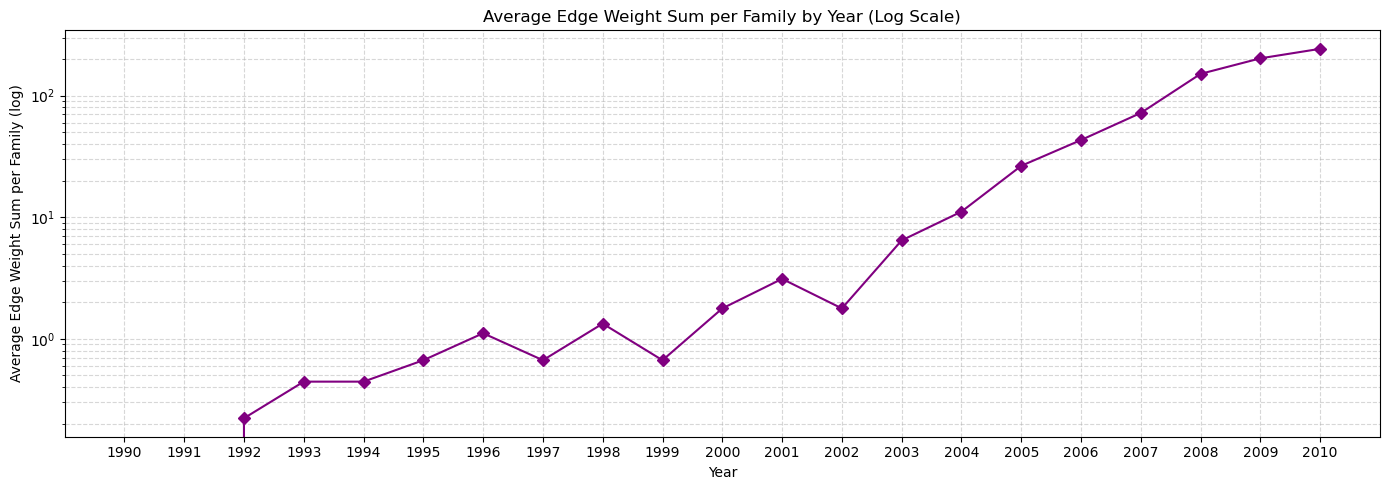

In [ ]:
#plot the average sum of edge weights per family for each year (log scale)

plt.figure(figsize=(14,5))
plt.plot(avg_weights_df.index, avg_weights_df['average_weight_sum'], marker='D', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Edge Weight Sum per Family (log)')
plt.title('Average Edge Weight Sum per Family by Year (Log Scale)')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5, which='both')
plt.xticks(avg_weights_df.index, [str(int(y)) for y in avg_weights_df.index])
plt.tight_layout()
plt.show()